In [2]:
import pandas as pd
import numpy as np

In [3]:
parking = pd.read_csv("../../Data/상관분석/구별주차장면수.csv", header=4)
car = pd.read_csv("../../Data/상관분석/구별차량등록대수.csv")
trans= pd.read_csv("../../Data/상관분석/대중교통이용량.csv")
area= pd.read_csv("../../Data/상관분석/면적.csv", header=1)
service= pd.read_csv("../../Data/상관분석/서비스업.csv", header=1)
pop= pd.read_csv("../../Data/상관분석/인구.csv", header=1)
move= pd.read_csv("../../Data/상관분석/평균유동인구.csv")
work= pd.read_csv("../../Data/상관분석/평균직장인구.csv")

In [4]:
parking= parking.rename(columns={'소계':'구별','177281':'주차장면수'}).sort_values('구별')[['구별','주차장면수']]
# parking

In [5]:
car= car.rename(columns={'시군구':'구별','계':'차량등록대수'})
# car

In [6]:
trans= trans.rename(columns={'대중교통 총이용량':'대중교통'})
# trans

In [7]:
area= area.rename(columns={'동별(2)':'구별'})[['구별','면적 (㎢)']]
# area

In [8]:
service= service.rename(columns={'자치구별(1)':'구별'})[['구별','서비스업']]
# service

In [9]:
pop= pop.rename(columns={'동별(2)':'구별'})[['구별','인구 (명)']]
# pop

In [10]:
move= move.rename(columns={'gu':'구별','평균유동인구':'유동인구'})[['구별','유동인구']]
# move

In [11]:
work= work.rename(columns={'gu':'구별','평균직장인구':'직장인구'})[['구별','직장인구']]
# work

In [12]:
merge= pd.concat([parking, car, trans, area, service, move, work, pop], join='inner', axis=1)
# merge

In [13]:
merge=pd.merge(parking, car, on='구별').merge(trans, on='구별').merge(area, on='구별').merge(service, on='구별').merge(move, on='구별').merge(work, on='구별').merge(pop, on='구별')
merge= merge.set_index('구별')
merge

,주차장면수,차량등록대수,대중교통,면적 (㎢),서비스업,유동인구,직장인구,인구 (명)
구별,,,,,,,,
강남구,13087,245487,40046.904762,39.50,31176,35741.666667,293.0,544055
강동구,10000,151959,21299.142857,24.59,12197,45264.666667,29.0,463998
강북구,5286,75122,46589.666667,23.60,6347,36604.666667,12.0,311569
강서구,8895,206522,28185.222222,41.44,16776,27433.666667,35.0,585901
관악구,6970,118273,62545.250000,29.57,11722,44154.000000,25.0,509803
광진구,4856,99115,34377.636364,17.06,10087,53250.333333,46.0,360109
구로구,5149,146038,35528.125000,20.12,9414,36924.333333,70.0,432488
금천구,3715,90501,52207.000000,13.02,5856,31379.333333,100.0,247835
노원구,3662,152375,25790.384615,35.44,11481,27103.500000,16.0,527032


<AxesSubplot:title={'center':'주차장면수/차량등록대수와 상관관계 분석'}>

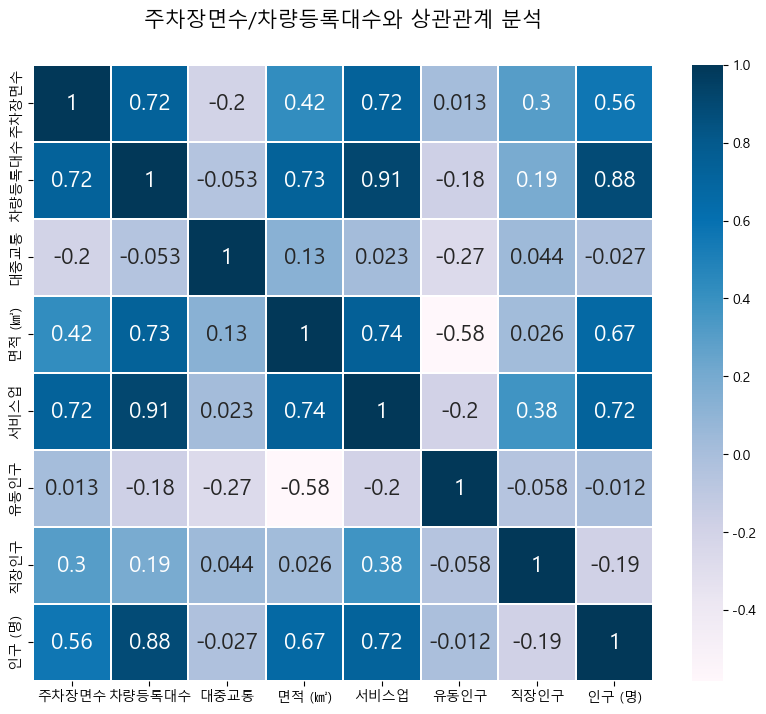

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
font_name= fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
plt.rc('font',family=font_name)

import matplotlib as mlp
mlp.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10, 8))
plt.title("주차장면수/차량등록대수와 상관관계 분석", y = 1.05, size = 15)
sns.heatmap(merge.astype(float).corr(), cmap=plt.cm.PuBu, linewidths = 0.1,
            annot = True,annot_kws = {"size" : 16})